In [64]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterstats import zonal_stats
from subprocess import Popen

In [65]:
def wf(x):
    return ('/Users/richardlee/Desktop/EE508/ProblemSet2/Colombia/') + x

In [66]:
def bf(x):
    return ('/Users/richardlee/Desktop/EE508/Processed/') + x

<AxesSubplot:>

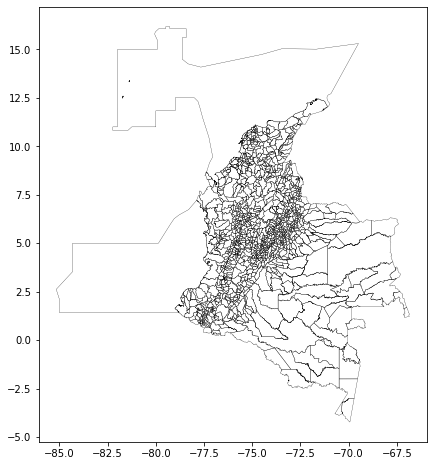

In [67]:
mun_raw = gpd.read_file('/Users/richardlee/Desktop/EE508/ProblemSet2/Colombia/input/Municipios.shp', encoding = 'utf-8')
mun_raw.plot(figsize = (15, 8), color = 'none', edgecolor='black', linewidth=0.25)

In [68]:
mun_raw['COD_DEPART'].isin(['88', None])

0       False
1       False
2       False
3       False
4       False
        ...  
1146    False
1147    False
1148    False
1149     True
1150     True
Name: COD_DEPART, Length: 1151, dtype: bool

<AxesSubplot:>

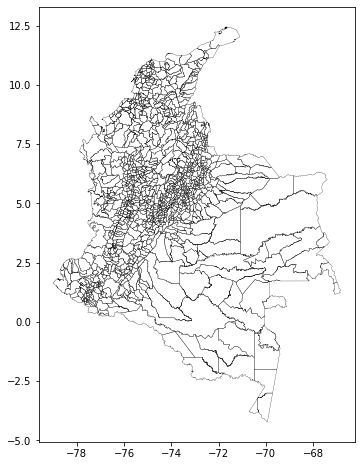

In [69]:
mun = mun_raw[mun_raw['COD_DEPART'].isin(['88', None]) == False]
mun.plot(figsize = (15, 8), color = 'none', edgecolor='black', linewidth=0.25)

In [70]:
mun = mun.dissolve(by='MUN')

In [71]:
mun.index = pd.Index(range(1, len(mun) + 1), name = 'id')

In [72]:
mun['cost'] = mun['AREA_KM']

In [73]:
mun['status'] = 0

In [74]:
mun.head()

,geometry,NOMBRE_ENT,CATEGORIA,DEPARTAMEN,COD_DEPART,COD_MUNICI,AREA_KM,OBSERVACIO,PK_CUE,DT,dt2,cost,status
id,,,,,,,,,,,,,
1,"POLYGON ((-75.66878 6.37300, -75.66802 6.37249...",MEDELLÍN,M,ANTIOQUIA,05,001,372.897934,None,502085.0,DTAO,ANDES OCC,372.897934,0
2,"POLYGON ((-75.41551 5.90179, -75.41534 5.90193...",ABEJORRAL,M,ANTIOQUIA,05,002,510.593949,None,502382.0,DTAO,ANDES OCC,510.593949,0
3,"POLYGON ((-76.01133 6.64633, -76.01142 6.64586...",ABRIAQUÍ,M,ANTIOQUIA,05,004,292.848815,None,502223.0,DTAO,ANDES OCC,292.848815,0
4,"POLYGON ((-75.02849 6.41628, -75.02842 6.41628...",ALEJANDRÍA,M,ANTIOQUIA,05,021,132.584682,None,502108.0,DTAO,ANDES OCC,132.584682,0
5,"POLYGON ((-75.67406 6.08290, -75.67384 6.08257...",AMAGÁ,M,ANTIOQUIA,05,030,82.870126,None,501989.0,DTAO,ANDES OCC,82.870126,0


In [140]:
mun_s.to_csv('/Users/richardlee/Desktop/EE508/ProblemSet2/Colombia/mun/input/pu.dat',columns = ['cost', 'status'], index = True)

In [76]:
mun[['geometry']].to_file('/Users/richardlee/Desktop/EE508/ProblemSet2/Colombia/mun/pulayer/pulayer.shp', index=True)

In [77]:
mun_s = mun.copy()
mun_s['geometry'] = mun_s['geometry'].simplify(0.005)
mun_s.to_crs({'init': 'epsg:4326'})
mun_s.to_file('/Users/richardlee/Desktop/EE508/ProblemSet2/Colombia/temp/pulayer_4326_simplified.shp')

/Users/richardlee/opt/miniconda3/envs/gis/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [114]:
mun_s.head()

,geometry,NOMBRE_ENT,CATEGORIA,DEPARTAMEN,COD_DEPART,COD_MUNICI,AREA_KM,OBSERVACIO,PK_CUE,DT,dt2,cost,status
id,,,,,,,,,,,,,
1,"POLYGON ((-75.66878 6.37300, -75.65153 6.33244...",MEDELLÍN,M,ANTIOQUIA,05,001,372.897934,None,502085.0,DTAO,ANDES OCC,9.002008,0
2,"POLYGON ((-75.41551 5.90179, -75.38049 5.88250...",ABEJORRAL,M,ANTIOQUIA,05,002,510.593949,None,502382.0,DTAO,ANDES OCC,68.386330,0
3,"POLYGON ((-76.01133 6.64633, -76.01649 6.57556...",ABRIAQUÍ,M,ANTIOQUIA,05,004,292.848815,None,502223.0,DTAO,ANDES OCC,406.523573,0
4,"POLYGON ((-75.02849 6.41628, -75.00680 6.38811...",ALEJANDRÍA,M,ANTIOQUIA,05,021,132.584682,None,502108.0,DTAO,ANDES OCC,83.965517,0
5,"POLYGON ((-75.67406 6.08290, -75.67173 6.05488...",AMAGÁ,M,ANTIOQUIA,05,030,82.870126,None,501989.0,DTAO,ANDES OCC,21.137097,0


In [79]:
sp = pd.read_csv('/Users/richardlee/Desktop/EE508/ProblemSet2/Colombia/temp/species.csv')

In [80]:
sp.index = pd.Index(range(1, len(sp) + 1), name = 'id')

In [81]:
sp['prop'] = 0.3
sp['spf'] = 1

In [82]:
sp.to_csv('/Users/richardlee/Desktop/EE508/ProblemSet2/Colombia/mun/input/spec.dat', columns = ['prop', 'spf', 'name'])

In [83]:
pu_x_sp = pd.DataFrame(index=mun.index.rename('pu'),
                      columns=sp.index.rename('species'))

In [84]:
for sp_id, sp_name in sp['name'].iloc[0:2].iteritems():
    print(sp_id, sp_name)

1 Aburria aburri
2 Aglaiocercus coelestis


In [85]:
simplified = ('/Users/richardlee/Desktop/EE508/ProblemSet2/Colombia/temp/pulayer_4326_simplified.shp')

In [86]:
sp.head()

,name,class,category,km2,prop,spf
id,,,,,,
1,Aburria aburri,bird,NT,139288.697561,0.3,1
2,Aglaiocercus coelestis,bird,LC,29539.117195,0.3,1
3,Akodon affinis,mamm,LC,42194.838061,0.3,1
4,Amazilia castaneiventris,bird,EN,15938.041983,0.3,1
5,Amazilia viridigaster,bird,LC,42935.760782,0.3,1


In [87]:
pu_path = pd.read_table('/Users/richardlee/Desktop/EE508/ProblemSet2/Colombia/mun/input/pu.dat')

In [88]:
pu_path

,"id,cost,status"
0,"1,372.89793369,0"
1,"2,510.59394925,0"
2,"3,292.84881503,0"
3,"4,132.58468234,0"
4,"5,82.87012589,0"
...,...
1115,"1116,4666.38592437,0"
1116,"1117,12205.6604356,0"
1117,"1118,18371.827366,0"
1118,"1119,3914.72953561,0"


In [89]:
for sp_id, sp_name in sp['name'].iteritems():
    zonal = zonal_stats(mun_s,
                       bf(sp_name.replace(' ','_') + '.tif'),
                       stats = ['sum'], all_touched = True, nodata = -1)
    zonal_v = pd.DataFrame(zonal, index=pu_x_sp.index)
    pu_x_sp.loc[:,sp_id] = zonal_v['sum'] 

In [90]:
travel_zonal = zonal_stats(mun_s, wf('accessibility_to_cities_col.tif'),
                          stats = ['mean'], all_touched = True,
                          nodata = -9999)

In [91]:
travel_time = pd.DataFrame(travel_zonal, index = mun_s.index)
travel_time

,mean
id,
1,9.002008
2,68.386330
3,406.523573
4,83.965517
5,21.137097
...,...
1116,3996.671985
1117,423.288610
1118,737.875659


In [126]:
mun_s['travel'] = travel_time

In [130]:
mun_s['cost'] = (mun_s['AREA_KM']*mun_s['travel']**-0.5)

In [131]:
mun_s.head()

,geometry,NOMBRE_ENT,CATEGORIA,DEPARTAMEN,COD_DEPART,COD_MUNICI,AREA_KM,OBSERVACIO,PK_CUE,DT,dt2,cost,status,travel
id,,,,,,,,,,,,,,
1,"POLYGON ((-75.66878 6.37300, -75.65153 6.33244...",MEDELLÍN,M,ANTIOQUIA,05,001,372.897934,None,502085.0,DTAO,ANDES OCC,124.285447,0,9.002008
2,"POLYGON ((-75.41551 5.90179, -75.38049 5.88250...",ABEJORRAL,M,ANTIOQUIA,05,002,510.593949,None,502382.0,DTAO,ANDES OCC,61.743467,0,68.386330
3,"POLYGON ((-76.01133 6.64633, -76.01649 6.57556...",ABRIAQUÍ,M,ANTIOQUIA,05,004,292.848815,None,502223.0,DTAO,ANDES OCC,14.524480,0,406.523573
4,"POLYGON ((-75.02849 6.41628, -75.00680 6.38811...",ALEJANDRÍA,M,ANTIOQUIA,05,021,132.584682,None,502108.0,DTAO,ANDES OCC,14.469145,0,83.965517
5,"POLYGON ((-75.67406 6.08290, -75.67173 6.05488...",AMAGÁ,M,ANTIOQUIA,05,030,82.870126,None,501989.0,DTAO,ANDES OCC,18.025002,0,21.137097


In [93]:
pu_x_sp

species,1,2,3,4,5,6,7,8,9,10,...,229,230,231,232,233,234,235,236,237,238
pu,,,,,,,,,,,,,,,,,,,,,
1,61.333254,0.0,69.000020,0.0,70.000000,65.222571,0.000000,0.0,0.0,0.0,...,59.111196,0.000000,0.000000,37.334097,69.444464,0.0,0.00000,0.000000,70.000000,69.555529
2,75.332018,0.0,75.998746,0.0,85.666120,87.777605,0.889009,0.0,0.0,0.0,...,62.887206,0.000000,0.000000,88.222122,76.443236,0.0,0.00000,0.000000,90.110992,66.553965
3,48.000458,0.0,56.000000,0.0,56.000000,37.443605,0.000000,0.0,0.0,0.0,...,44.444599,0.000000,0.000000,48.556262,56.000000,0.0,3.77851,0.000000,56.000000,53.889173
4,36.000000,0.0,26.111921,0.0,36.000000,36.000000,0.000000,0.0,0.0,0.0,...,25.778846,34.555286,0.000000,36.000000,34.222395,0.0,0.00000,0.000000,36.000000,27.889580
5,14.443115,0.0,17.888243,0.0,20.443944,19.666021,0.000000,0.0,0.0,0.0,...,6.887552,0.000000,0.000000,14.554547,16.887907,0.0,0.00000,0.000000,22.000000,11.998499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,0.000000,0.0,0.000000,0.0,0.000000,22.557819,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,392.894370,345.223967,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
1117,0.000000,0.0,0.000000,0.0,0.000000,1137.673405,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,20.889596,0.000000,0.0,0.00000,1696.000000,0.000000,0.000000
1118,0.000000,0.0,0.000000,0.0,202.447030,767.997281,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,576.778075,0.000000,0.0,0.00000,1964.880632,0.000000,0.000000


<AxesSubplot:>

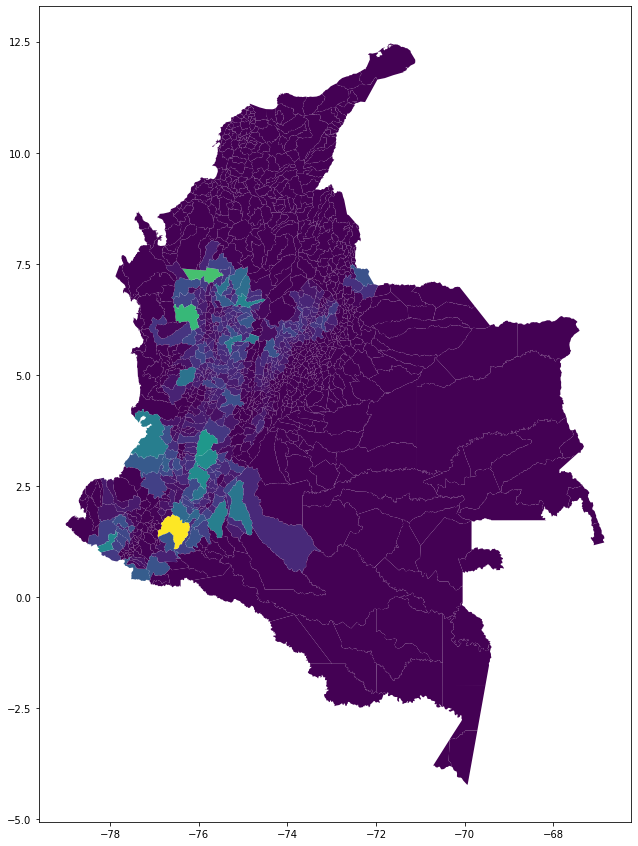

In [119]:
mun_s.join(pu_x_sp).plot(1, figsize = (15, 15))

In [95]:
pu_x_sp.to_csv('/Users/richardlee/Desktop/EE508/ProblemSet2/Colombia/temp/pu_x_sp.csv')

In [96]:
puorder = pu_x_sp.stack()

In [97]:
puorder = pu_x_sp.stack().rename('amount').reset_index()
puorder = puorder[puorder['amount'].gt(0)][['species', 'pu', 'amount']]
puorder.to_csv(wf('mun/input/puorder.dat'), index=False)

In [98]:
geom1 = mun_s.loc[1]['geometry']
geom2 = mun_s.loc[8]['geometry']
geom_new = geom1.intersection(geom2)
geom_new.length

0.013269995152740154

In [99]:
bound_list = []
from itertools import combinations
for id1, id2 in combinations(mun.index, 2):
    geom1 = mun_s.loc[id1]['geometry']
    geom2 = mun_s.loc[id2]['geometry']
    new_geom = geom1.intersection(geom2)
    if new_geom.length > 0:
        boundary = new_geom.length
        bound_list += [[id1, id2, boundary]]
        bound = pd.DataFrame(bound_list, columns = ['id', 'id2', 'boundary'])
bound

,id,id2,boundary
0,1,8,0.013270
1,1,19,0.266992
2,1,41,0.028203
3,1,44,0.030848
4,1,47,0.073866
...,...,...,...
3018,1117,1118,0.753963
3019,1117,1120,1.918249
3020,1118,1119,1.372791
3021,1118,1120,3.352851


In [100]:
len(bound_list)

3023

In [101]:
bound = pd.DataFrame(bound_list, columns = ['id', 'id2', 'boundary'])

In [102]:
bound

,id,id2,boundary
0,1,8,0.013270
1,1,19,0.266992
2,1,41,0.028203
3,1,44,0.030848
4,1,47,0.073866
...,...,...,...
3018,1117,1118,0.753963
3019,1117,1120,1.918249
3020,1118,1119,1.372791
3021,1118,1120,3.352851


In [103]:
bound.to_csv('/Users/richardlee/Desktop/EE508/ProblemSet2/Colombia/mun/input/bound.dat', index = False)

In [104]:
from itertools import combinations
sum([1 for i in combinations(mun.index, 2)])

626640

In [105]:
len(mun)

1120

In [141]:
def run_marxan(folder):
    import os 
    marxan_command = './MarOpt_v243_Mac64'
    os.chdir(folder)
    return Popen(marxan_command).wait()

run_marxan(wf('mun'))


0

In [134]:
def change_marxan_parameters(filepath, change_dict):
    """
    Function to change the parameters in a Marxan parameter file
    
    Parameters
    ----------
    filepath : str
        Complete path of the parameter file. Usually ends with 'input.dat')
    change_dict : dict
        Dictionary of parameter values to be changed
        Example: {'BLM':0.1,'NUMREPS':100}
    """

    import os, re
    
    # Check if configuration file exists
    if not os.path.exists(filepath):
        print(filepath + ' not found')
        
    # Read configuration file
    with open(filepath) as file:
        old_text = file.read()
    
    # Copy the text, keep the old one
    new_text = old_text
    
    # Loop through each dictionary item
    for key, value in change_dict.items():
        # Define REGEX search pattern string
        search_regex = '\n' + key.upper() + ' +[0-9A-Za-z. -]+\n'
        
        # If the parameter can be found, print warning and skip to next item
        if re.search(search_regex, new_text) is None:
            print('Parameter ' + key + ' not found')
            continue

        # Define replacement string
        if type(value) == float and value < 0.001:
            value = '{0:.10f}'.format(value)
        replace_str = '\n' + key.upper() + ' ' + str(value) + '\n'

        # Replace strings
        new_text = re.sub(search_regex, replace_str, new_text)

    # If a change has been made, write the file
    if new_text != old_text:
        with open(filepath,'w') as file:
            file.write(new_text)
            print('Saved new parameters to ' + filepath.split('/')[-1])


In [135]:
from matplotlib.colors import LinearSegmentedColormap
cmap_dict = {'red':   [(0.0,  1.0, 1.0),
                       (1.0,  0.06, 0.06)],
             'green': [(0.0,  1.0, 1.0),
                       (1.0,  0.25, 0.25)],
             'blue':  [(0.0,  1.0, 1.0),
                       (1.0,  0.98, 0.98)]}
my_cmap = LinearSegmentedColormap('', cmap_dict)

1e-05
Saved new parameters to input.dat
0.0001
Saved new parameters to input.dat
0.001
Saved new parameters to input.dat
0.01
Saved new parameters to input.dat
0.1
Saved new parameters to input.dat
1
Saved new parameters to input.dat
10
Saved new parameters to input.dat
100
Saved new parameters to input.dat
1000
Saved new parameters to input.dat
10000
Saved new parameters to input.dat


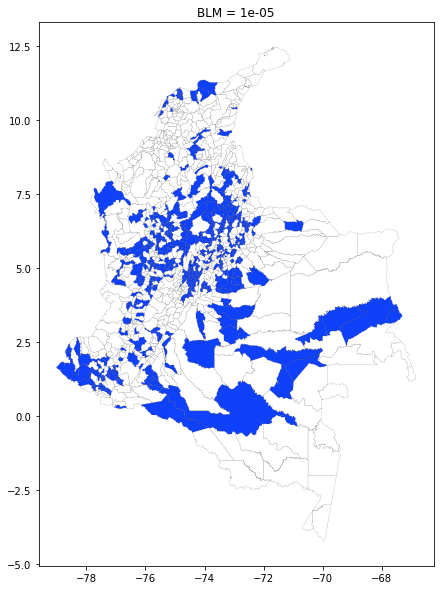

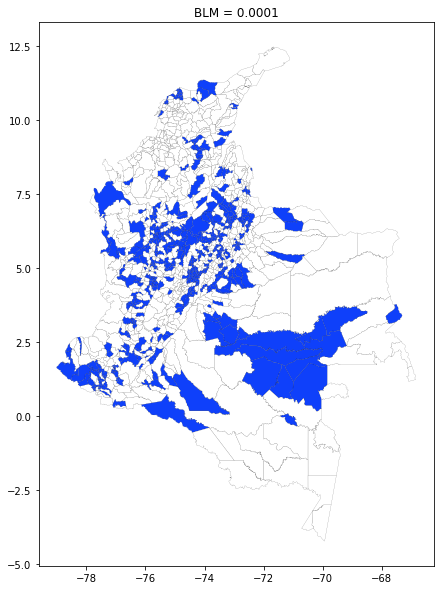

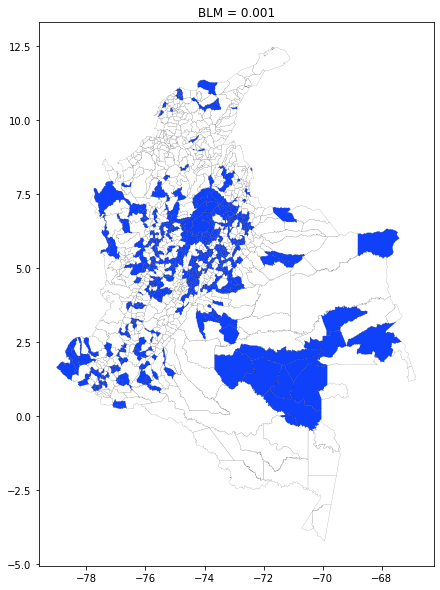

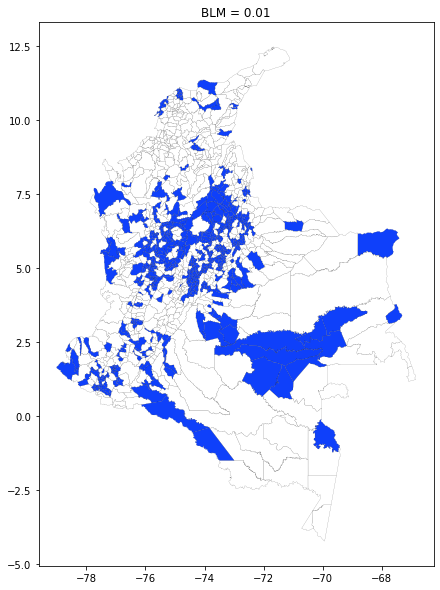

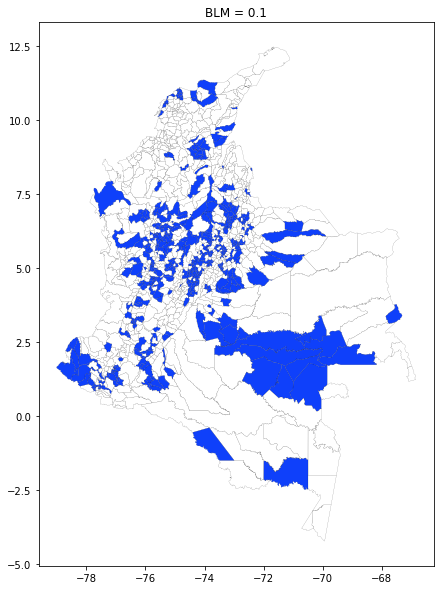

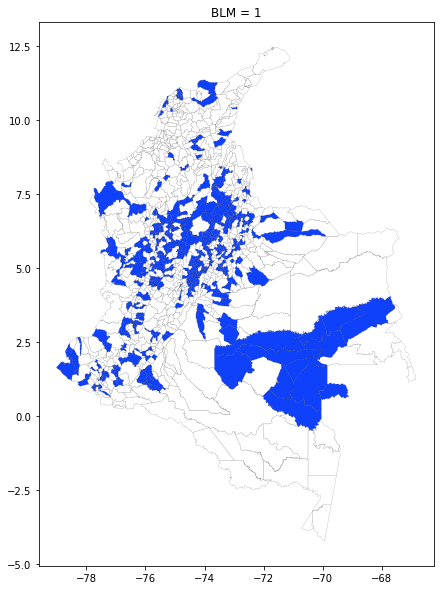

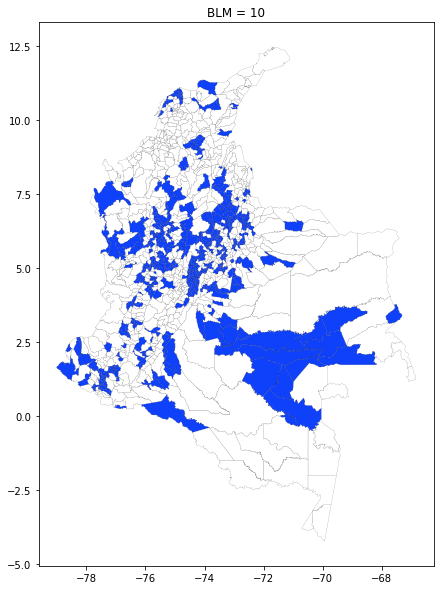

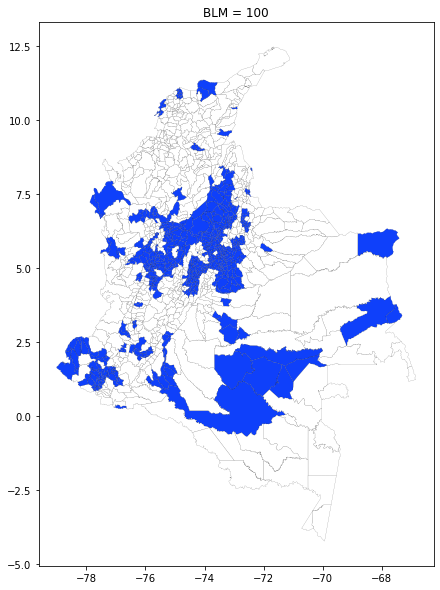

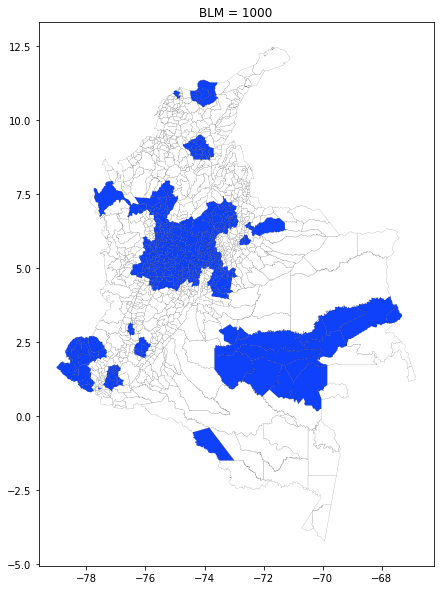

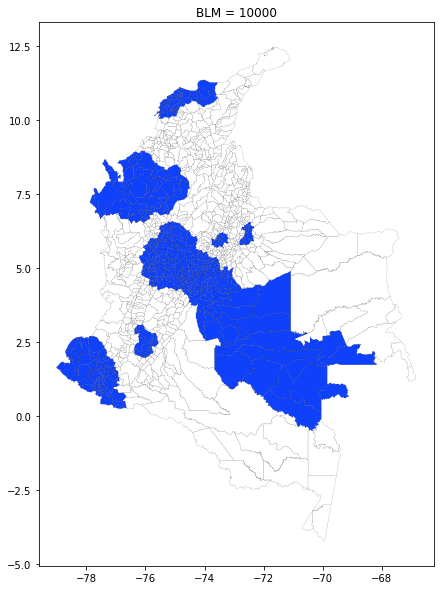

In [136]:
for blm_exp in range (-5, 5):
    blm = 10 ** blm_exp
    print(blm)
    change_marxan_parameters(wf('mun/input.dat'), 
                             {'BLM': blm, 'NUMREPS': 1})
    run_marxan(wf('mun'))
    sol = pd.read_csv(wf('mun/output/output_best.csv')).set_index('PUID')
    mun_s.join(sol).plot('SOLUTION', cmap=my_cmap, figsize=(10, 10),
                       edgecolor='black', linewidth=0.1)
    plt.title('BLM = ' + str(blm))


In [137]:
d = pd.read_csv(wf('mun/output/output_ssoln.csv')).set_index('planning_unit')
d

,number
planning_unit,
1120,0
1119,0
1118,0
1117,0
1116,1
...,...
5,0
4,1
3,1


<AxesSubplot:>

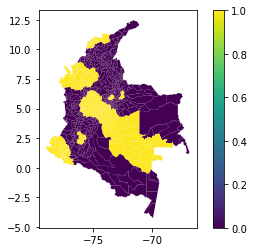

In [138]:
mun_s.join(d).plot('number', legend = True)

Saved new parameters to input.dat


<AxesSubplot:title={'center':'Map of Selection Frequency in Colombia (BLM:1000, EPSG: 4686)'}>

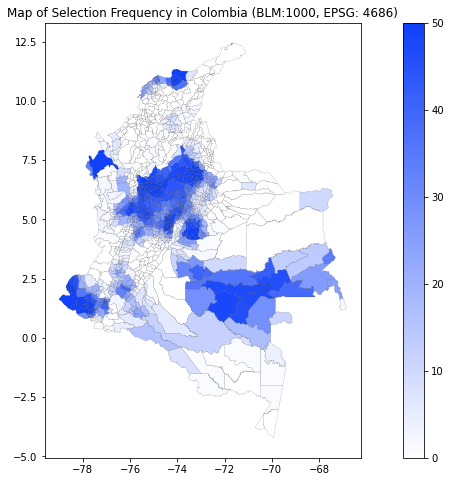

In [139]:
fig, ax = plt.subplots(figsize=(15, 8))
change_marxan_parameters(wf('mun/input.dat'), 
                             {'BLM': 1000, 'NUMREPS': 50})
ax.set_title('Map of Selection Frequency in Colombia (BLM:1000, EPSG: 4686)')
run_marxan(wf('mun'))
d = pd.read_csv(wf('mun/output/output_ssoln.csv')).set_index('planning_unit')
mun_s.join(d).plot('number', cmap=my_cmap, figsize=(10, 10),
                       edgecolor='black', linewidth=0.1, ax=ax, legend = True)